
# Radar Charts

* ``mplsoccer``, ``radar_chart`` module helps one to plot radar charts in a few lines of code.

* The radar-chart inspiration is [StatsBomb](https://twitter.com/StatsBomb/)
  and [Rami Moghadam](https://cargocollective.com/ramimo/2013-NBA-All-Stars)

* Here we will show some examples of how to use ``mplsoccer`` to plot radar charts.

We have re-written the [Soccerplots](https://github.com/Slothfulwave612/soccerplots)  Radar module
to enable greater customisation of the Radar. You can now set the edge color, decide the number of
concentric circles, and use hatching or path_effects.


In [34]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

## Setting the Radar Boundaries
One of the most important decisions with Radars is setting the Radar's boundaries.
StatsBomb popularised the use of Radars for showing player statistics. I recommend checking out
[understanding football radars for mugs and muggles](https://statsbomb.com/2016/04/understand-football-radars-for-mugs-and-muggles/).
StatsBomb's rule of thumb is: "Radar boundaries represent the top 5% and bottom 5%
of all statistical production by players in that position."



In [41]:
# parameter names of the statistics we want to show
#params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
#          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
#          "Dribbles Completed", "Pressure Regains", "Touches In Box", "Miscontrol"]

params = ["Non-Penalty Goals", "npxG: Non-Penalty xG", "Shots Total", "Assists", "xAG: Exp. Assisted Goals", "npxG + xAG", "Shot-Creating Actions",
         "Passes Attempted", "Pass Completion %", "Progressive Passes", "Progressive Carries", "Successful Take-Ons", "Touches (Att Pen)", "Progressive Passes Rec"]

# The lower and upper boundaries for the statistics
#low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 0]
#high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5, 5]
low = [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#high = [3, 3, 10, 3, 3, 3, 10, 50, 100, 5, 10, 10, 30, 50]
high = [2, 2, 5, 2, 2, 2, 5, 20, 100, 5, 5, 5, 10, 10]


# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

## Instantiate the Radar Class
We will instantiate a ``Radar`` object with the above parameters so that we can re-use it
several times.



In [42]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

## Load some fonts
We will use mplsoccer's ``FontManager`` to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
[ridge_map library](https://github.com/ColCarroll/ridge_map).



In [43]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

## Player Values
Here are the player values we are going to plot. The values are taken
from the excellent [fbref](https://fbref.com/en/) website (supplied by StatsBomb).



In [44]:
#bruno_values =   [0.22, 0.25, 0.30, 2.54, 0.43, 5.60, 4.34, 0.29, 0.69, 5.14, 4.97, 1.10]
#bruyne_values =  [0.25, 0.52, 0.37, 3.59, 0.41, 6.36, 5.68, 0.57, 1.23, 4.00, 4.54, 1.39]
#erikson_values = [0.13, 0.10, 0.35, 3.08, 0.29, 6.23, 5.08, 0.43, 0.67, 3.07, 1.34, 1.06]

viktor_values = [0.75, 0.59, 3.42, 0.33, 0.25, 0.84, 4.14, 24.76, 71.8, 1.53, 3.72, 2.07, 8.78, 10.91]
victor_values = [0.52, 0.51, 3.73, 0.11, 0.14, 0.65, 2.47, 13.65, 67.8, 0.96, 1.59, 0.77, 6.82, 6.68]

## Making a Simple Radar Chart
Here we will make a very simple radar chart using the ``radar_chart`` module.
We will only change the default face and edge colors.



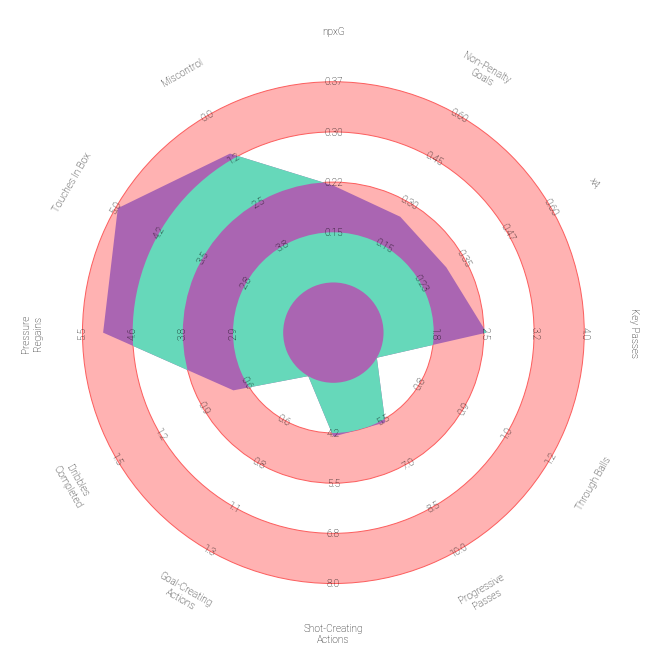

In [6]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels

## Adding lines from the center to the edge
Here we add spokes from the radar center to the edge using ``Radar.spoke``.



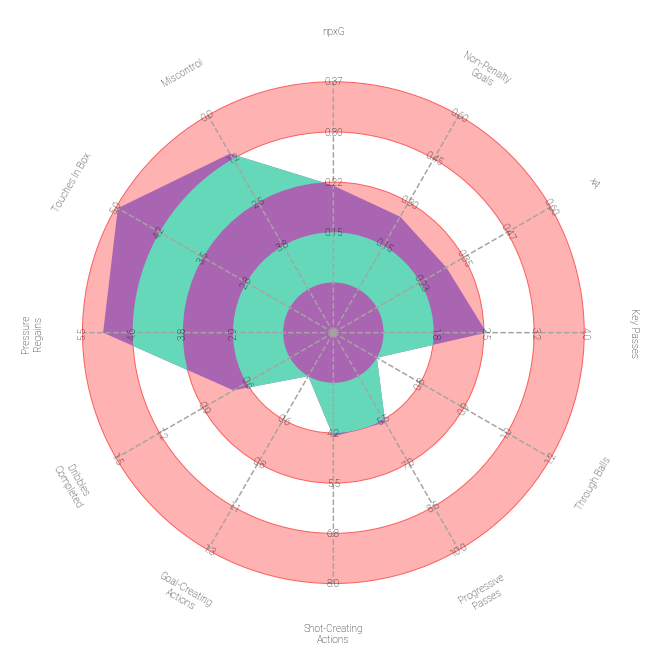

In [7]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, zorder=2.5,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels
lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

## Making a Simple Comparison
Here we plot two players on the same axes to compare players.



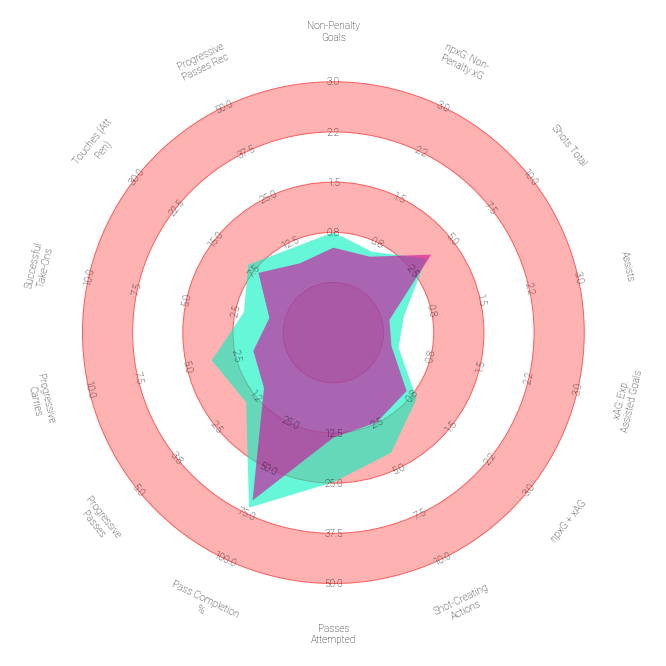

In [39]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(viktor_values, victor_values, ax=ax,
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)

## Comparing three or more players
Here we demonstrate comparing three players on the same chart. It's possible to
add as many as you want by stacking ``Radar.draw_radar_solid``



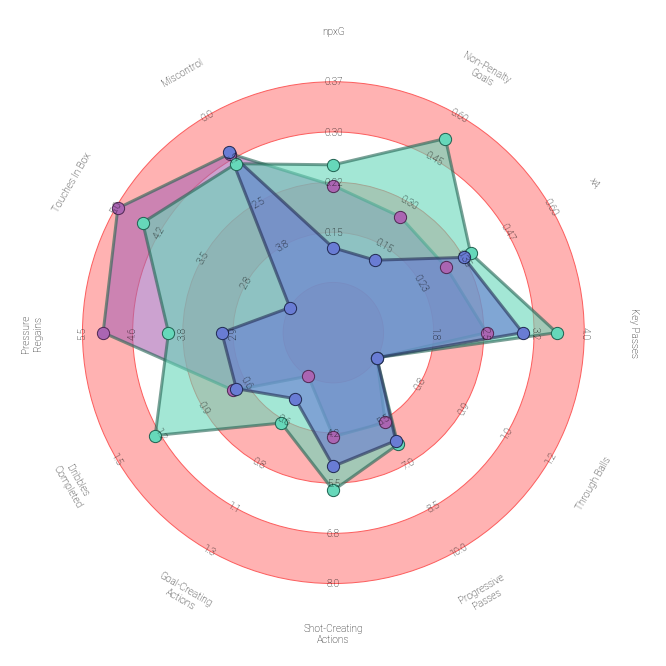

In [9]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')

radar1, vertices1 = radar.draw_radar_solid(bruno_values, ax=ax,
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(bruyne_values, ax=ax,
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(erikson_values, ax=ax,
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

ax.scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
ax.scatter(vertices2[:, 0], vertices2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)
ax.scatter(vertices3[:, 0], vertices3[:, 1],
           c='#697cd4', edgecolors='#222b54', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)

## Comparison Radar with Titles
Here we will make a very simple radar chart using ``mplsoccer`` module ``radar_chart``.
We will only change the default facecolors.



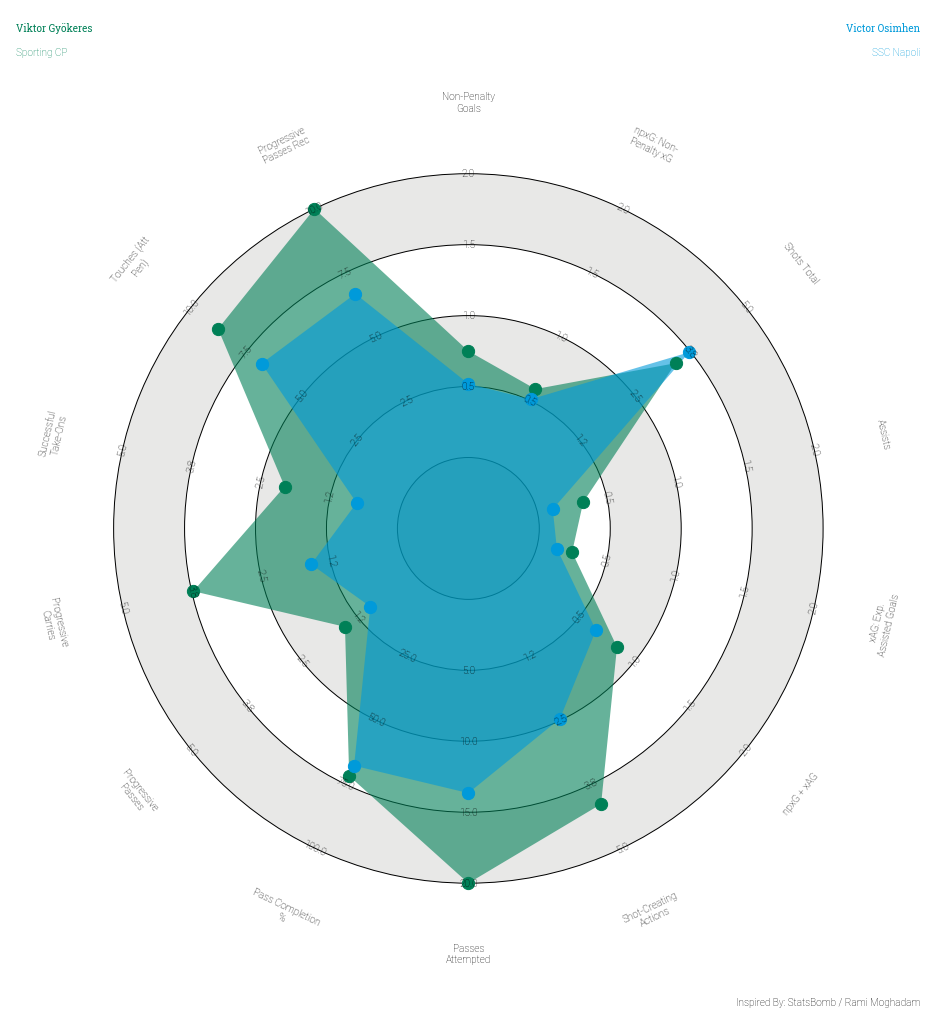

In [50]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#e8e8e7', edgecolor='#000000')
radar_output = radar.draw_radar_compare(viktor_values, victor_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#008057', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#009ada', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#008057', edgecolors='#008057', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#009ada', edgecolors='#009ada', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Viktor Gyökeres', fontsize=150, color='#008057',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Sporting CP', fontsize=150,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#008057')
title3_text = axs['title'].text(0.99, 0.65, 'Victor Osimhen', fontsize=150,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#009ada')
title4_text = axs['title'].text(0.99, 0.25, 'SSC Napoli', fontsize=150,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#009ada')


plt.savefig(
	"C:/Users/jeffr/OneDrive/Desktop/Github Activities/Football-Analysis/Football/09 Player Radar/Figures/Viktor_vs_Victor.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

## Dark Theme



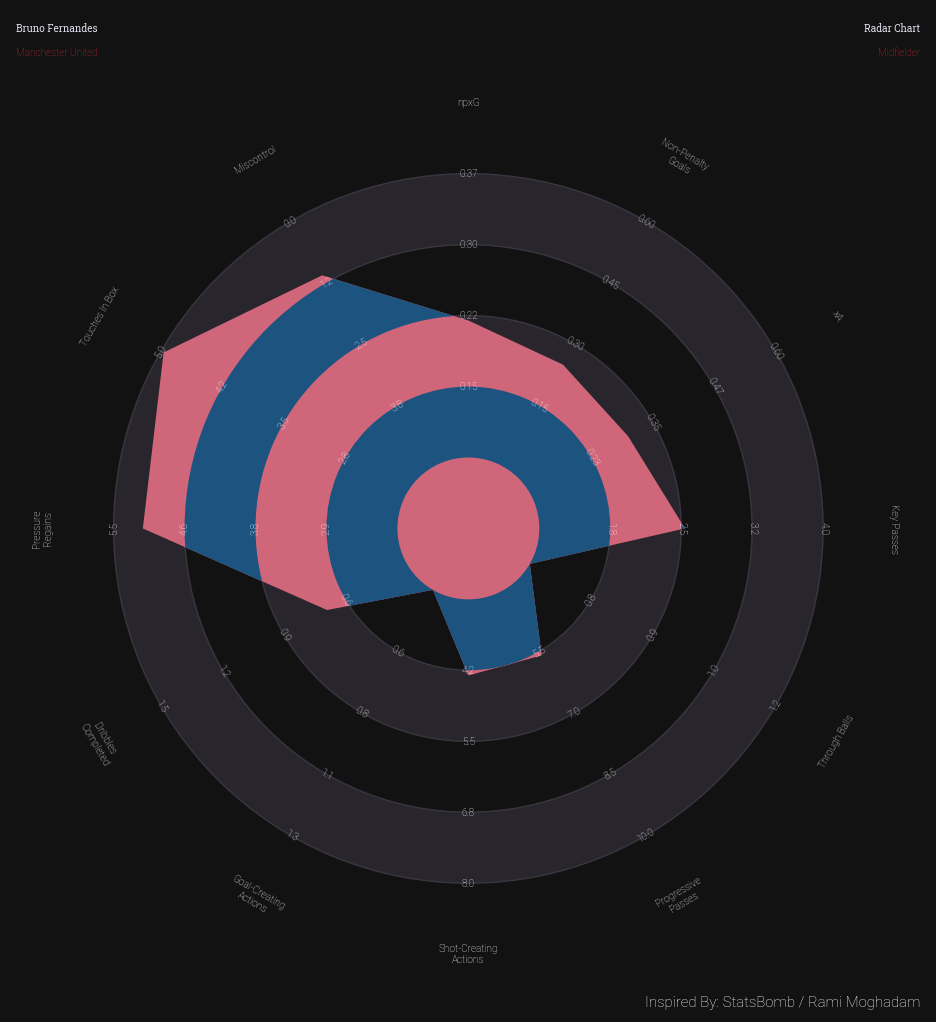

In [13]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(bruno_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#cc2a3f')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#cc2a3f')

fig.set_facecolor('#121212')